In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp tree-species-identification-dataset.zip /content/drive/MyDrive/

In [ ]:
!unzip tree-species-identification-dataset.zip -d /content/drive/MyDrive/

Archive:  tree-species-identification-dataset.zip
replace /content/drive/MyDrive/Tree_Species_Dataset/.git/HEAD? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_path = "/content/drive/MyDrive/Tree_Species_Dataset"

In [ ]:
import os
class_names = os.listdir(data_path)
class_names = [folder for folder in class_names if os.path.isdir(os.path.join(data_path, folder))]

print("Available Tree Species (Classes):")
print(class_names)

Available Tree Species (Classes):
['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [ ]:
for class_name in class_names:
  folder_path=os.path.join(data_path,class_name)
  size=len(os.listdir(folder_path))
  print(f"Class: {class_name}\t\tSize: {size}")

Class: .git		Size: 5
Class: amla		Size: 50
Class: asopalav		Size: 50
Class: babul		Size: 50
Class: bamboo		Size: 50
Class: banyan		Size: 50
Class: bili		Size: 50
Class: cactus		Size: 50
Class: champa		Size: 50
Class: coconut		Size: 50
Class: garmalo		Size: 50
Class: gulmohor		Size: 50
Class: gunda		Size: 50
Class: jamun		Size: 50
Class: kanchan		Size: 50
Class: kesudo		Size: 50
Class: khajur		Size: 50
Class: mango		Size: 50
Class: motichanoti		Size: 50
Class: neem		Size: 50
Class: nilgiri		Size: 50
Class: other		Size: 150
Class: pilikaren		Size: 50
Class: pipal		Size: 50
Class: saptaparni		Size: 50
Class: shirish		Size: 50
Class: simlo		Size: 50
Class: sitafal		Size: 50
Class: sonmahor		Size: 50
Class: sugarcane		Size: 50
Class: vad		Size: 50


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1280 images belonging to 31 classes.
Found 320 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.0750 - loss: 3.4389 - val_accuracy: 0.0938 - val_loss: 3.3262
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.1300 - loss: 3.2543 - val_accuracy: 0.1125 - val_loss: 3.1070
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.1223 - loss: 3.1774 - val_accuracy: 0.1562 - val_loss: 2.9848
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.1444 - loss: 3.0250 - val_accuracy: 0.1813 - val_loss: 2.8891
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.1470 - loss: 2.9733 - val_accuracy: 0.1813 - val_loss: 2.9370
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.1573 - loss: 3.0245 - val_accuracy: 0.2031 - val_loss: 2.8189
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.2019 - loss: 2.8420 - val_accuracy: 0.2250 - val_loss: 2.7103
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.2166 - loss: 2.7716 - val_accuracy: 0.2062 - val_loss

In [ ]:
model.save("tree_species_model.h5")

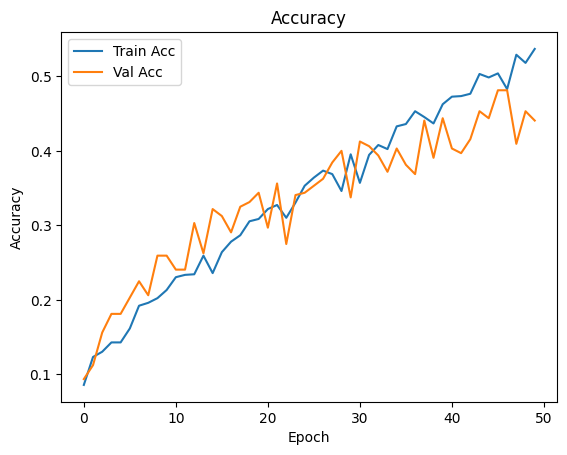

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
files.download('tree_species_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>